In [4]:
import sys
import csv
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel
from pandas import pivot_table, crosstab, melt, merge
import seaborn as sb
import numpy as np
import datetime as dt


In [5]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [6]:
df = pd.read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\과제물/sunsplots.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,관측일자(OBSR_YMD),SRS번호(SRS_NO),숫자(NUM),위치(LOC),캐링턴경도(CARGTN_LOT),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),경도각도거리(LOT_ANGLE_DSTNC),태양흑점수(SS_CNT),자기장유형(MAG_TY),PLAGE숫자(PLAGE_NUM),PLAGE위치(PLAGE_LOC),경도(LOT),반환숫자(GVBK_NUM),위도리턴값(LAT_RETN_VALUE),캐링턴리턴값(CARGTN_RETN_VALUE),생성일시(CRT_DT),관측V일자(OBSR_VYMD)
1,2023-07-12 00:30:00,193,3372,N22E75,276,0270,Hkx,02,03,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
2,2023-07-12 00:30:00,193,3371,S15E59,292,0020,Hax,01,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
3,2023-07-12 00:30:00,193,3370,S14E47,304,0050,Dao,07,08,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
4,2023-07-12 00:30:00,193,3369,S18W51,042,0060,Cso,05,04,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2023-04-12 00:30:00,102,3277,N10E20,092,0010,Cro,01,01,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000
716,2023-04-12 00:30:00,102,3276,S20E63,050,0080,Dao,07,03,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000
717,2023-04-12 00:30:00,102,3275,N20E48,065,0050,Hsx,01,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000
718,2023-04-12 00:30:00,102,3273,N09W01,114,0100,Dsi,07,12,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000


In [7]:
df.dtypes

Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
Unnamed: 12    object
Unnamed: 13    object
Unnamed: 14    object
Unnamed: 15    object
Unnamed: 16    object
Unnamed: 17    object
dtype: object

In [8]:
df = df.rename(columns = df.iloc[0])
df.drop([0], axis = 0, inplace = True)
df

,관측일자(OBSR_YMD),SRS번호(SRS_NO),숫자(NUM),위치(LOC),캐링턴경도(CARGTN_LOT),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),경도각도거리(LOT_ANGLE_DSTNC),태양흑점수(SS_CNT),자기장유형(MAG_TY),PLAGE숫자(PLAGE_NUM),PLAGE위치(PLAGE_LOC),경도(LOT),반환숫자(GVBK_NUM),위도리턴값(LAT_RETN_VALUE),캐링턴리턴값(CARGTN_RETN_VALUE),생성일시(CRT_DT),관측V일자(OBSR_VYMD)
1,2023-07-12 00:30:00,193,3372,N22E75,276,0270,Hkx,02,03,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
2,2023-07-12 00:30:00,193,3371,S15E59,292,0020,Hax,01,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
3,2023-07-12 00:30:00,193,3370,S14E47,304,0050,Dao,07,08,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
4,2023-07-12 00:30:00,193,3369,S18W51,042,0060,Cso,05,04,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
5,2023-07-12 00:30:00,193,3368,S17W64,053,0100,Dao,07,14,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-12,20230712003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2023-04-12 00:30:00,102,3277,N10E20,092,0010,Cro,01,01,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000
716,2023-04-12 00:30:00,102,3276,S20E63,050,0080,Dao,07,03,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000
717,2023-04-12 00:30:00,102,3275,N20E48,065,0050,Hsx,01,01,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000
718,2023-04-12 00:30:00,102,3273,N09W01,114,0100,Dsi,07,12,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-12,20230412003000


In [9]:
df2 = df.filter(['관측일자(OBSR_YMD)','SRS번호(SRS_NO)', '위치(LOC)',	'면적값(AREA_VALUE)',	'태양흑점모양분류내용(SS_SHP_CL_CN)', '태양흑점수(SS_CNT)', '자기장유형(MAG_TY)'])
df2 = df2.sort_values('관측일자(OBSR_YMD)')
df2

,관측일자(OBSR_YMD),SRS번호(SRS_NO),위치(LOC),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),태양흑점수(SS_CNT),자기장유형(MAG_TY)
719,2023-04-12 00:30:00,102,S21E10,0250,Fkc,36,Beta-Gamma
715,2023-04-12 00:30:00,102,N10E20,0010,Cro,01,Beta
718,2023-04-12 00:30:00,102,N09W01,0100,Dsi,12,Beta
717,2023-04-12 00:30:00,102,N20E48,0050,Hsx,01,Alpha
716,2023-04-12 00:30:00,102,S20E63,0080,Dao,03,Beta
...,...,...,...,...,...,...,...
10,2023-07-12 00:30:00,193,S08W20,0030,Hsx,01,Alpha
11,2023-07-12 00:30:00,193,N25W51,0250,Dhi,20,Beta-Gamma
12,2023-07-12 00:30:00,193,N25W72,0010,Bxo,05,Beta
7,2023-07-12 00:30:00,193,S11W67,0120,Cso,07,Beta


In [10]:
rdf = df2.rename(columns={'관측일자(OBSR_YMD)' : '관측일자','SRS번호(SRS_NO)' : 'SRS번호', '위치(LOC)': '위치',	'면적값(AREA_VALUE)' : '크기',	'태양흑점모양분류내용(SS_SHP_CL_CN)': '모양' , '태양흑점수(SS_CNT)' : '흑점수',	 '자기장유형(MAG_TY)' : '자기장'})
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
719,2023-04-12 00:30:00,102,S21E10,0250,Fkc,36,Beta-Gamma
715,2023-04-12 00:30:00,102,N10E20,0010,Cro,01,Beta
718,2023-04-12 00:30:00,102,N09W01,0100,Dsi,12,Beta
717,2023-04-12 00:30:00,102,N20E48,0050,Hsx,01,Alpha
716,2023-04-12 00:30:00,102,S20E63,0080,Dao,03,Beta
...,...,...,...,...,...,...,...
10,2023-07-12 00:30:00,193,S08W20,0030,Hsx,01,Alpha
11,2023-07-12 00:30:00,193,N25W51,0250,Dhi,20,Beta-Gamma
12,2023-07-12 00:30:00,193,N25W72,0010,Bxo,05,Beta
7,2023-07-12 00:30:00,193,S11W67,0120,Cso,07,Beta


In [11]:
rdf.dtypes

관측일자     object
SRS번호    object
위치       object
크기       object
모양       object
흑점수      object
자기장      object
dtype: object

In [12]:
rdf['관측일자'] = rdf['관측일자'].astype('str')
rdf['관측일자'] = pd.to_datetime(rdf['관측일자'])
rdf['관측일자'] = rdf['관측일자'].apply(lambda x : dt.datetime.strftime(x, '%y-%m-%d'))
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
719,23-04-12,102,S21E10,0250,Fkc,36,Beta-Gamma
715,23-04-12,102,N10E20,0010,Cro,01,Beta
718,23-04-12,102,N09W01,0100,Dsi,12,Beta
717,23-04-12,102,N20E48,0050,Hsx,01,Alpha
716,23-04-12,102,S20E63,0080,Dao,03,Beta
...,...,...,...,...,...,...,...
10,23-07-12,193,S08W20,0030,Hsx,01,Alpha
11,23-07-12,193,N25W51,0250,Dhi,20,Beta-Gamma
12,23-07-12,193,N25W72,0010,Bxo,05,Beta
7,23-07-12,193,S11W67,0120,Cso,07,Beta


In [13]:
rdf.value_counts()

관측일자      SRS번호  위치      크기    모양   흑점수  자기장  
23-04-12  102    N09W01  0100  Dsi  12   Beta     1
23-06-18  169    S23W66  0060  Hsx  02   Alpha    1
23-06-16  167    N11E73  0020  Cao  02   Beta     1
                 N17E47  0010  Axx  01   Alpha    1
                 N17E69  0010  Axx  01   Alpha    1
                                                 ..
23-05-16  136    S18W50  0010  Bxo  05   Beta     1
23-05-17  137    N09W16  0100  Dai  18   Beta     1
                 N12W00  0010  Bxo  02   Beta     1
                 N14W27  0030  Hrx  06   Alpha    1
23-07-12  193    S21E05  0780  Cko  21   Beta     1
Name: count, Length: 719, dtype: int64

In [30]:
rdf['흑점수'] = rdf['흑점수'].astype('int')
rdf.copy()
bf = rdf.filter(['관측일자','흑점수'])
cdf = bf.groupby('관측일자').sum()
cdf = cdf.reset_index()
cdf

,관측일자,흑점수
0,23-04-12,53
1,23-04-13,57
2,23-04-14,54
3,23-04-15,73
4,23-04-16,71
...,...,...
87,23-07-08,77
88,23-07-09,87
89,23-07-10,63
90,23-07-11,71


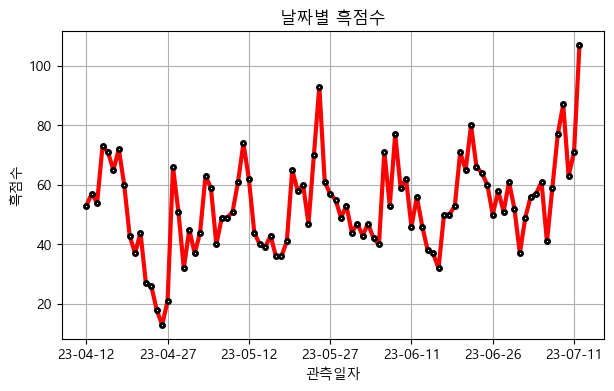

In [36]:
plt.figure()
plt.title('날짜별 흑점수')
plt.plot(cdf['관측일자'], cdf['흑점수'], color="#fc0303", linestyle='-', linewidth=3,
         marker="o", markersize = 3, markerfacecolor = "#ffffff",
         markeredgecolor = "#000000", markeredgewidth=2)

plt.xlabel('관측일자')
plt.ylabel('흑점수')
plt.grid()

total_len = len(cdf['관측일자'])

plt.xticks(np.arange(0, total_len + 1, 15))
plt.show()
plt.close()